# Análise variação do preço da gasolina

**Objetivo da análise**

Gerar uma tabela com a variação percentural ano a ano do preço médio da gasolina comum no estado do Rio de Janeiro.

**Base de Dados no Kaggle**

[https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('precos.tsv', sep='\t', parse_dates=['DATA INICIAL', 'DATA FINAL'])

In [11]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [12]:
df.tail()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120822,2021-04-25,2021-05-01,NORTE,TOCANTINS,OLEO DIESEL S10,18,R$/l,4.352,0.156,4.199,4.699,-99999.0,0.036,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [34]:
df.shape

(120823, 18)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   120823 non-null  datetime64[ns]
 1   DATA FINAL                     120823 non-null  datetime64[ns]
 2   REGIÃO                         120823 non-null  object        
 3   ESTADO                         120823 non-null  object        
 4   PRODUTO                        120823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 6   UNIDADE DE MEDIDA              120823 non-null  object        
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64       
 11  

In [15]:
df_tratado = df.loc[:, :"PREÇO MÁXIMO REVENDA"].copy()

In [16]:
df_tratado.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400


# Tratando Colunas

In [18]:
df.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'],
      dtype='object')

In [19]:
def tratar_nome_colunas(colunas):
    colunas_tratadas = (
        colunas.str.strip()
               .str.lower()
               .str.replace(' ', '_', regex=True)
               .str.replace(r'[^\w]', '', regex=True)
    )
    return colunas_tratadas

In [22]:
df_tratado.columns = tratar_nome_colunas(df_tratado.columns)

# Análise Exploratória

In [23]:
df_tratado.head()

,data_inicial,data_final,região,estado,produto,número_de_postos_pesquisados,unidade_de_medida,preço_médio_revenda,desvio_padrão_revenda,preço_mínimo_revenda,preço_máximo_revenda
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400


In [25]:
len(df_tratado['estado'].unique())

27

In [27]:
df_tratado['estado'].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [26]:
df_tratado['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

In [30]:
df_tratado['data_inicial'].max()

Timestamp('2021-04-25 00:00:00')

In [33]:
df_rj_gas_comum = df_tratado.query("estado == 'RIO DE JANEIRO'and produto == 'GASOLINA COMUM'").copy()

In [35]:
df_rj_gas_comum.head()

,data_inicial,data_final,região,estado,produto,número_de_postos_pesquisados,unidade_de_medida,preço_médio_revenda,desvio_padrão_revenda,preço_mínimo_revenda,preço_máximo_revenda
12086,2004-05-09,2004-05-15,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1071,R$/l,2.045,0.109,1.70,2.599
12113,2004-05-16,2004-05-22,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.040,0.113,1.70,2.599
12140,2004-05-23,2004-05-29,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.042,0.108,1.70,2.599
12167,2004-05-30,2004-06-05,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.053,0.111,1.73,2.599
12194,2004-06-06,2004-06-12,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.063,0.107,1.76,2.599


# Configurando o Index

In [36]:
df_rj_gas_comum.set_index('data_final', inplace=True)

In [39]:
df_rj_gas_comum.head()

,data_inicial,região,estado,produto,número_de_postos_pesquisados,unidade_de_medida,preço_médio_revenda,desvio_padrão_revenda,preço_mínimo_revenda,preço_máximo_revenda
data_final,,,,,,,,,,
2004-05-15,2004-05-09,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1071,R$/l,2.045,0.109,1.70,2.599
2004-05-22,2004-05-16,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.040,0.113,1.70,2.599
2004-05-29,2004-05-23,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.042,0.108,1.70,2.599
2004-06-05,2004-05-30,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1055,R$/l,2.053,0.111,1.73,2.599
2004-06-12,2004-06-06,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1091,R$/l,2.063,0.107,1.76,2.599


In [42]:
datas = []
for i in df_rj_gas_comum.index:
    datas.append((i.year, i.month))

In [46]:
set(datas)

{(2004, 5),
 (2004, 6),
 (2004, 7),
 (2004, 8),
 (2004, 9),
 (2004, 10),
 (2004, 11),
 (2004, 12),
 (2005, 1),
 (2005, 2),
 (2005, 3),
 (2005, 4),
 (2005, 5),
 (2005, 6),
 (2005, 7),
 (2005, 8),
 (2005, 9),
 (2005, 10),
 (2005, 11),
 (2005, 12),
 (2006, 1),
 (2006, 2),
 (2006, 3),
 (2006, 4),
 (2006, 5),
 (2006, 6),
 (2006, 7),
 (2006, 8),
 (2006, 9),
 (2006, 10),
 (2006, 11),
 (2006, 12),
 (2007, 1),
 (2007, 2),
 (2007, 3),
 (2007, 4),
 (2007, 5),
 (2007, 6),
 (2007, 7),
 (2007, 8),
 (2007, 9),
 (2007, 10),
 (2007, 11),
 (2007, 12),
 (2008, 1),
 (2008, 2),
 (2008, 3),
 (2008, 4),
 (2008, 5),
 (2008, 6),
 (2008, 7),
 (2008, 8),
 (2008, 9),
 (2008, 10),
 (2008, 11),
 (2008, 12),
 (2009, 1),
 (2009, 2),
 (2009, 3),
 (2009, 4),
 (2009, 5),
 (2009, 6),
 (2009, 7),
 (2009, 8),
 (2009, 9),
 (2009, 10),
 (2009, 11),
 (2009, 12),
 (2010, 1),
 (2010, 2),
 (2010, 3),
 (2010, 4),
 (2010, 5),
 (2010, 6),
 (2010, 7),
 (2010, 8),
 (2010, 9),
 (2010, 10),
 (2010, 11),
 (2010, 12),
 (2011, 1),
 (2011,

In [49]:
df_rj_gas_comum = df_rj_gas_comum.loc['2005':'2020'].copy()

In [50]:
df_rj_gas_comum.shape

(822, 10)

# Estatísticas

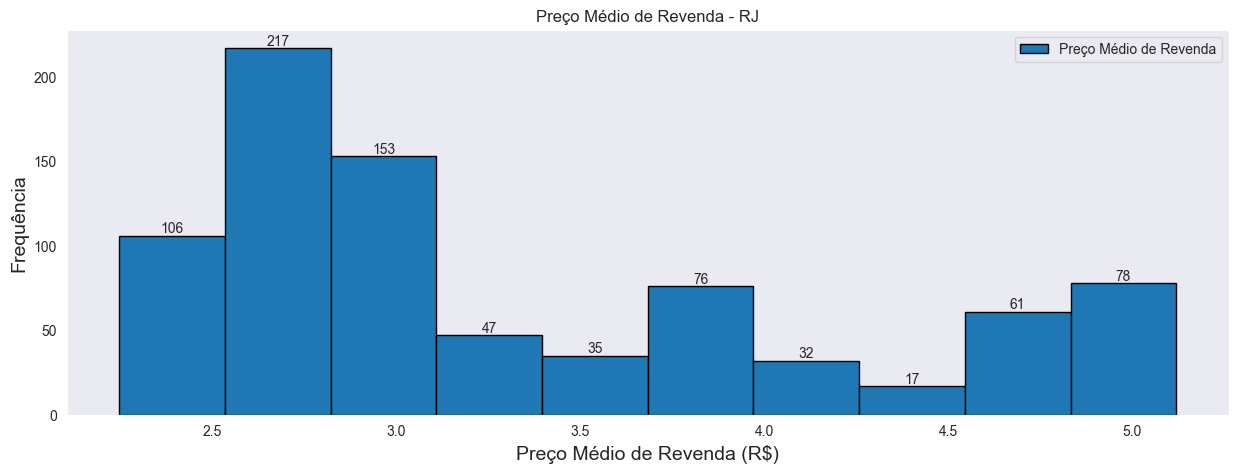

<Figure size 640x480 with 0 Axes>

In [100]:
plt.figure(figsize=(15, 5))
frequenci, limites_barras, barras = plt.hist(df_rj_gas_comum['preço_médio_revenda'], bins=10, edgecolor='black')
plt.title('Preço Médio de Revenda - RJ')
plt.xlabel('Preço Médio de Revenda (R$)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

for i in range(len(barras)):
    plt.text(barras[i].get_x() + barras[i].get_width() / 2, barras[i].get_height(),
             f'{int(barras[i].get_height())}', ha='center', va='bottom')

plt.legend(['Preço Médio de Revenda'])
plt.show()
plt.savefig('Histograma - Preço Médio de Revenda')

In [55]:
sns.set_style('dark')

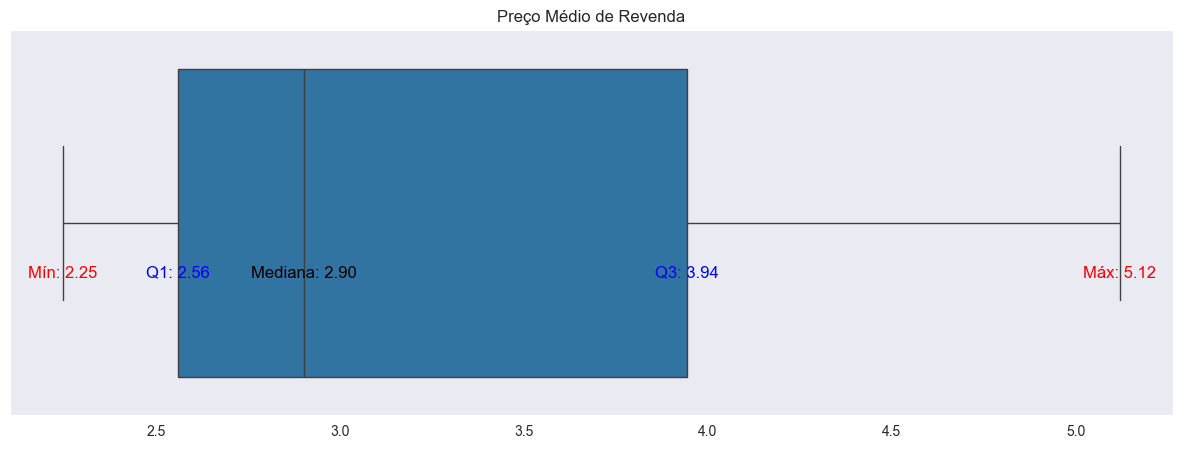

<Figure size 640x480 with 0 Axes>

In [101]:
plt.figure(figsize=(15, 5))
boxplot = sns.boxplot(data=df_rj_gas_comum, x='preço_médio_revenda', );
plt.title('Preço Médio de Revenda')
plt.legend([], frameon=False)
plt.xlabel('')

quartis = df_rj_gas_comum['preço_médio_revenda'].quantile([0.25, 0.5, 0.75])
mediana = quartis[0.5]
q1 = quartis[0.25]
q3 = quartis[0.75]
minimo = df_rj_gas_comum['preço_médio_revenda'].min()
maximo = df_rj_gas_comum['preço_médio_revenda'].max()

plt.text(mediana, 0.15, f'Mediana: {mediana:.2f}', ha='center', va='bottom', color='black', fontsize=12)
plt.text(q1, 0.15, f'Q1: {q1:.2f}', ha='center', va='bottom', color='blue', fontsize=12)
plt.text(q3, 0.15, f'Q3: {q3:.2f}', ha='center', va='bottom', color='blue', fontsize=12)
plt.text(minimo, 0.15, f'Mín: {minimo:.2f}', ha='center', va='bottom', color='red', fontsize=12)
plt.text(maximo, 0.15, f'Máx: {maximo:.2f}', ha='center', va='bottom', color='red', fontsize=12)

plt.show()
plt.savefig('Boxplot - Preço Médio de Revenda.png')

In [62]:
df_rj_gas_comum['preço_médio_revenda'].describe().round(2)

count    822.00
mean       3.30
std        0.87
min        2.25
25%        2.56
50%        2.90
75%        3.94
max        5.12
Name: preço_médio_revenda, dtype: float64

# Tabela de Variação %

In [63]:
df_rj_gas_comum.head()

,data_inicial,região,estado,produto,número_de_postos_pesquisados,unidade_de_medida,preço_médio_revenda,desvio_padrão_revenda,preço_mínimo_revenda,preço_máximo_revenda
data_final,,,,,,,,,,
2005-01-01,2004-12-26,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1066,R$/l,2.293,0.101,2.050,2.749
2005-01-08,2005-01-02,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1096,R$/l,2.297,0.098,1.990,2.749
2005-01-15,2005-01-09,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1069,R$/l,2.292,0.101,2.039,2.749
2005-01-22,2005-01-16,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1094,R$/l,2.296,0.099,2.000,2.749
2005-01-29,2005-01-23,SUDESTE,RIO DE JANEIRO,GASOLINA COMUM,1073,R$/l,2.290,0.103,2.009,2.749


In [67]:
df_tabela = df_rj_gas_comum.groupby(df_rj_gas_comum.index.year).agg({
    'preço_médio_revenda': np.mean
}).copy()

C:\Users\lbbas\AppData\Local\Temp\ipykernel_4488\4251224035.py:1: FutureWarning: The provided callable <function mean at 0x0000014BAEAFF880> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_tabela = df_rj_gas_comum.groupby(df_rj_gas_comum.index.year).agg({


In [68]:
df_tabela

,preço_médio_revenda
data_final,
2005,2.338588
2006,2.561365
2007,2.532077
2008,2.546731
2009,2.564980
2010,2.647788
2011,2.832698
2012,2.852827
2013,2.995442


In [69]:
df_tabela.shift(1)

,preço_médio_revenda
data_final,
2005,NaN
2006,2.338588
2007,2.561365
2008,2.532077
2009,2.546731
2010,2.564980
2011,2.647788
2012,2.832698
2013,2.852827


In [70]:
df_tabela['valor_ano_anterio'] = df_tabela.shift(1)

In [81]:
df_tabela = df_tabela.loc['2006':].copy()

In [82]:
df_tabela['variacao_percentual'] = round(((df_tabela['preço_médio_revenda'] / df_tabela['valor_ano_anterio']) - 1) * 100, 2)

In [83]:
df_tabela

,preço_médio_revenda,valor_ano_anterio,variacao_percentual
data_final,,,
2006,2.561365,2.338588,9.53
2007,2.532077,2.561365,-1.14
2008,2.546731,2.532077,0.58
2009,2.564980,2.546731,0.72
2010,2.647788,2.564980,3.23
2011,2.832698,2.647788,6.98
2012,2.852827,2.832698,0.71
2013,2.995442,2.852827,5.00
2014,3.132115,2.995442,4.56


In [84]:
df_tabela.to_excel('tabela_variacao_gasolina_rj.xlsx')